# Библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,TunedThresholdClassifierCV, cross_validate, FixedThresholdClassifier
from sklearn.preprocessing import PowerTransformer,StandardScaler,QuantileTransformer,PolynomialFeatures,PowerTransformer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer, fbeta_score,confusion_matrix
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.feature_selection import SelectFpr

from collections import OrderedDict
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss,accuracy_score

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate


In [2]:
pd.options.display.max_columns = None

### Область работы 2 (поиск  модели .... )

In [3]:
path_train = 'train.csv'
path_train_y = 'train_Y.csv'

## Чтение файла и EDA

In [4]:
train_X = pd.read_csv(path_train)
print(train_X.shape)
train_X.head()

(47363, 21)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0


In [5]:
train_y = pd.read_csv(path_train_y)
print(train_y.shape)

(47363, 1)


In [6]:
train = pd.concat([train_X, train_y], axis=1) 
train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0


In [7]:
train.drop_duplicates(inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46578 entries, 0 to 47362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                46578 non-null  float64
 1   HighChol              46578 non-null  float64
 2   CholCheck             46578 non-null  float64
 3   BMI                   46578 non-null  float64
 4   Smoker                46578 non-null  float64
 5   Stroke                46578 non-null  float64
 6   HeartDiseaseorAttack  46578 non-null  float64
 7   PhysActivity          46578 non-null  float64
 8   Fruits                46578 non-null  float64
 9   Veggies               46578 non-null  float64
 10  HvyAlcoholConsump     46578 non-null  float64
 11  AnyHealthcare         46578 non-null  float64
 12  NoDocbcCost           46578 non-null  float64
 13  GenHlth               46578 non-null  float64
 14  MentHlth              46578 non-null  float64
 15  PhysHlth              46

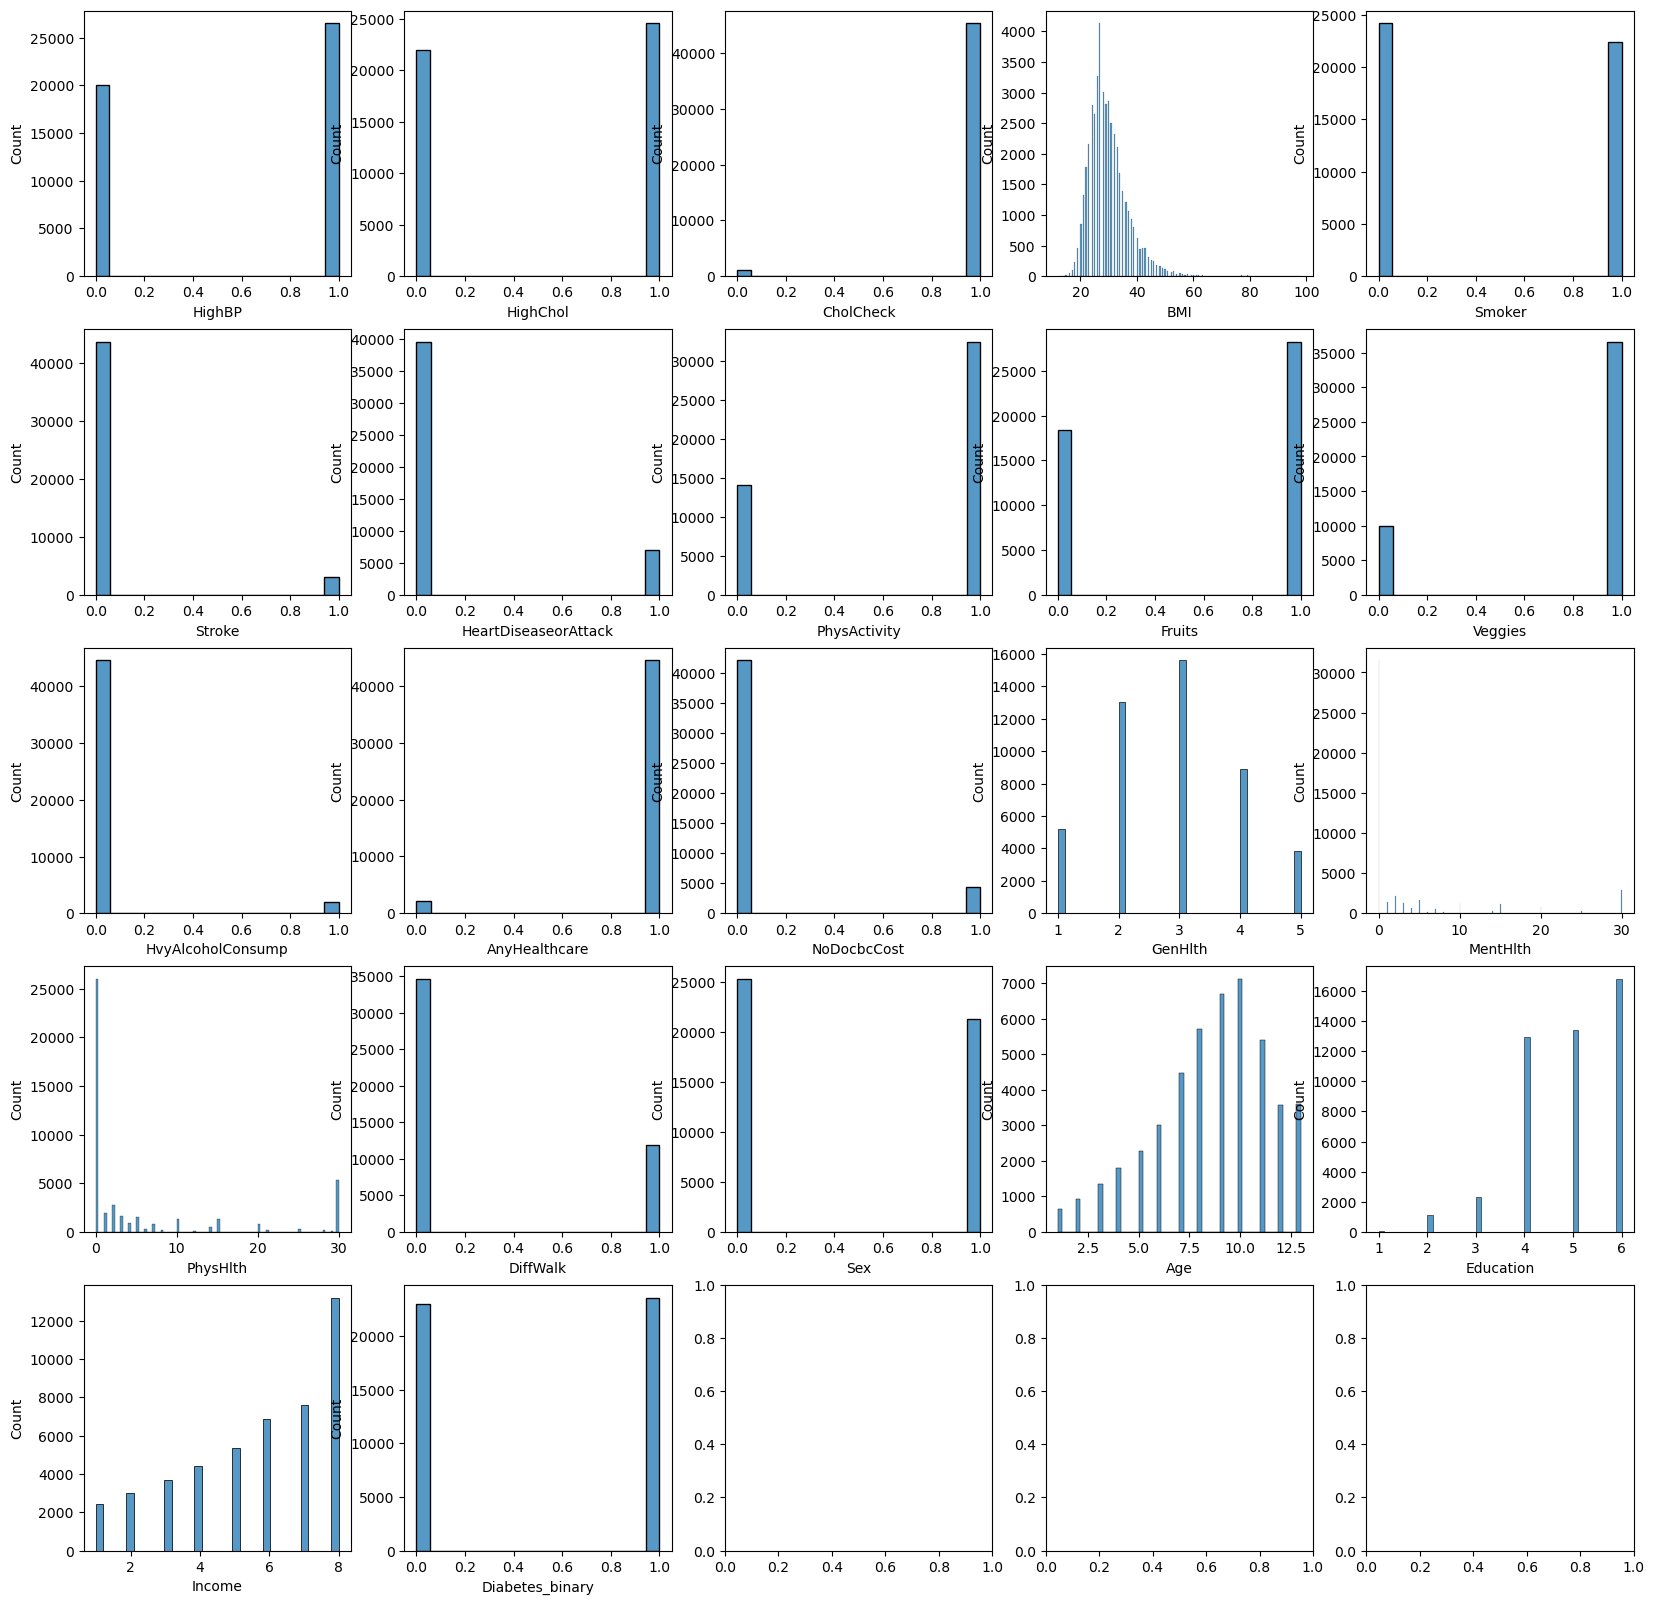

In [9]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

for i, col in enumerate(train.columns):
    sns.histplot(x=train[col], ax=axs[i//5, i%5])

In [10]:
X = train.drop(['Diabetes_binary'], axis=1)
y = train['Diabetes_binary'] 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
print(X_test.shape)

(13974, 21)


# Метрика

Метрика должна быть нацелена на выявление диабета, при этом штрафовать за пропущенный диабет в два раза больше, чем за ошибочный диагноз диабета.

In [11]:
beta = 2 ** (0.5)
scorer = make_scorer(fbeta_score, beta=beta)

# Фичи

In [12]:
train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

### Корреляция фич

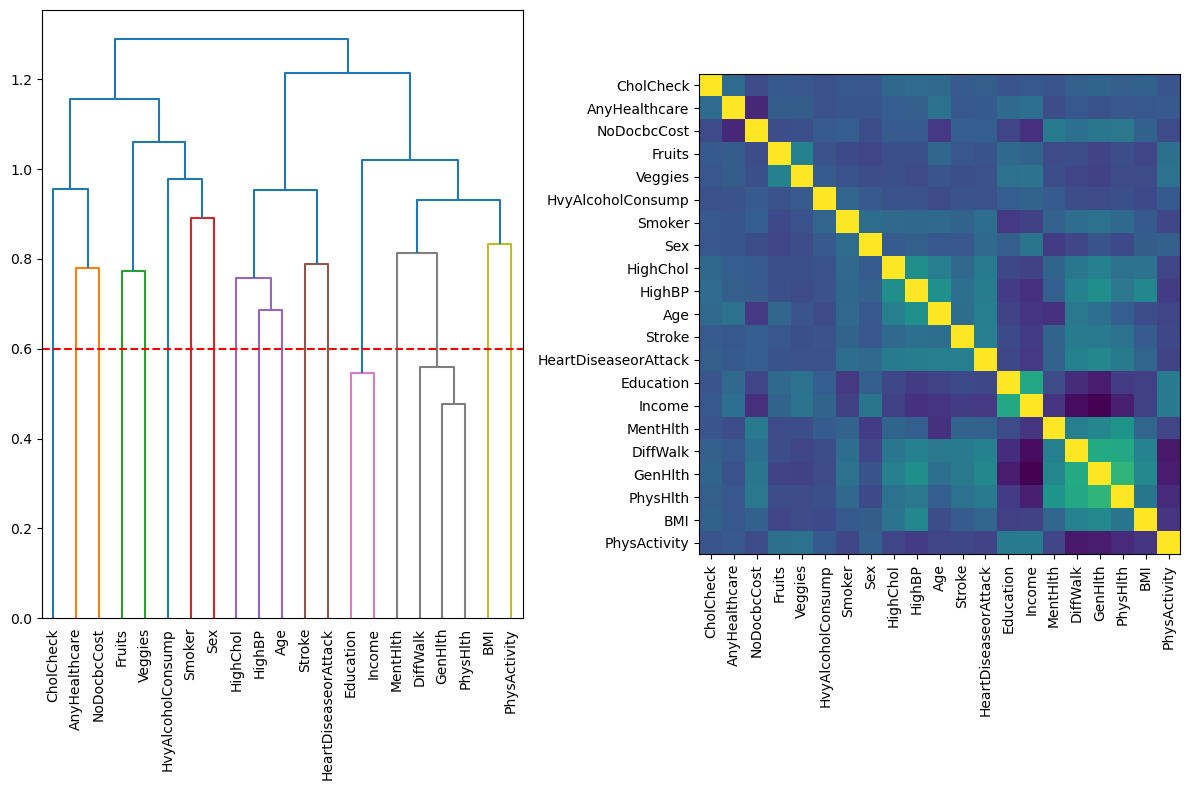

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = train_X.columns,
    ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=0.6, color='r', linestyle='--')
ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(train_X.columns[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(train_X.columns[dendro["leaves"]])
fig.tight_layout()
plt.show()

## Тесты

In [14]:
select_pct = SelectFpr()
select_pct.fit(X_train, y_train)
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (32604, 21)
форма массива X_train_selected: (32604, 21)


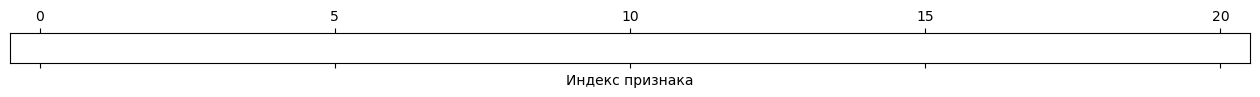

In [15]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

Думаю из этого можно сделать вывод, что все фичи важные и улучшают метрику

# Леса

In [16]:
forest = RandomForestClassifier(n_estimators=1000, oob_score = True, n_jobs=-1)
forest.fit(X_train, y_train)

forest_predict = forest.predict(X_test)
forest_predict_proba = forest.predict_proba(X_test)[:,1]

print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, forest_predict, beta=beta)))

Правильность на обучающем наборе: 0.997
Правильность на OOB: 0.733
Правильность на тестовом наборе: 0.733
Метрика на тестовом наборе: 0.75563


## Подбор гиперпараметрв

### n_estimators

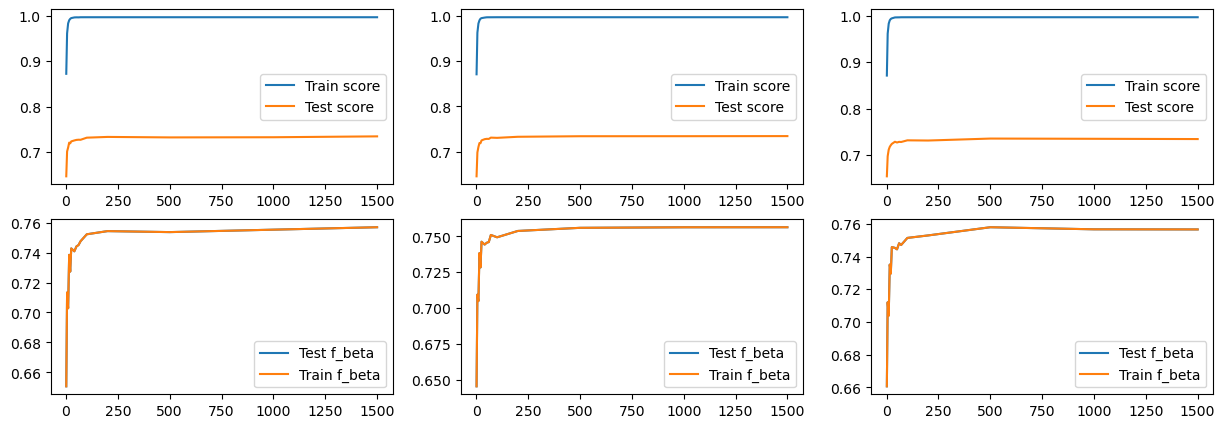

In [20]:
sc_train1 =[]
sc_test1 = []
sc_test_f1 = []
sc_train_f1 = []

sc_train2 =[]
sc_test2 = []
sc_test_f2 = []
sc_train_f2 = []

sc_train3 =[]
sc_test3 = []
sc_test_f3 = []
sc_train_f3 = []

n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000, 1500]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, n_jobs = -1)
    rf.fit(X_train, y_train)
    
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train_n_f = fbeta_score(y_train, rf.predict(X_train), beta=beta)
    sc_test_n_f = fbeta_score(y_test, rf.predict(X_test), beta=beta)
    
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)
    sc_train_f1.append(sc_test_n_f)
    sc_test_f1.append(sc_test_n_f)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train_n_f = fbeta_score(y_train, rf.predict(X_train), beta=beta)
    sc_test_n_f = fbeta_score(y_test, rf.predict(X_test), beta=beta)
    
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n) 
    sc_test_f2.append(sc_test_n_f)
    sc_train_f2.append(sc_test_n_f)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, n_jobs = -1, criterion= 'log_loss')
    rf.fit(X_train, y_train)
    
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train_n_f = fbeta_score(y_train, rf.predict(X_train), beta=beta)
    sc_test_n_f = fbeta_score(y_test, rf.predict(X_test), beta=beta)  
    
    sc_train3.append(sc_train_n)
    sc_test3.append(sc_test_n)
    sc_test_f3.append(sc_test_n_f)
    sc_train_f3.append(sc_test_n_f)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.plot(n_estimators,sc_train1, label='Train score')
ax1.plot(n_estimators,sc_test1, label='Test score')
ax4.plot(n_estimators,sc_test_f1, label='Test f_beta')
ax4.plot(n_estimators,sc_train_f1, label='Train f_beta')

ax2.plot(n_estimators,sc_train2, label='Train score')
ax2.plot(n_estimators,sc_test2,label='Test score')
ax5.plot(n_estimators,sc_test_f2,label='Test f_beta')
ax5.plot(n_estimators,sc_train_f2,label='Train f_beta')

ax3.plot(n_estimators,sc_train3,label='Train score')
ax3.plot(n_estimators,sc_test3,label='Test score')
ax6.plot(n_estimators,sc_test_f3,label='Test f_beta')
ax6.plot(n_estimators,sc_train_f3,label='Train f_beta')

ax1.legend();
ax2.legend();
ax3.legend();
ax4.legend();
ax5.legend();
ax6.legend();

In [17]:
forest = RandomForestClassifier(n_estimators=750, oob_score = True, n_jobs=-1)
forest.fit(X_train, y_train)

forest_predict = forest.predict(X_test)
forest_predict_proba = forest.predict_proba(X_test)[:,1]

print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, forest_predict, beta=beta)))

Правильность на обучающем наборе: 0.997
Правильность на OOB: 0.733
Правильность на тестовом наборе: 0.732
Метрика на тестовом наборе: 0.75538


### min_samples_leaf

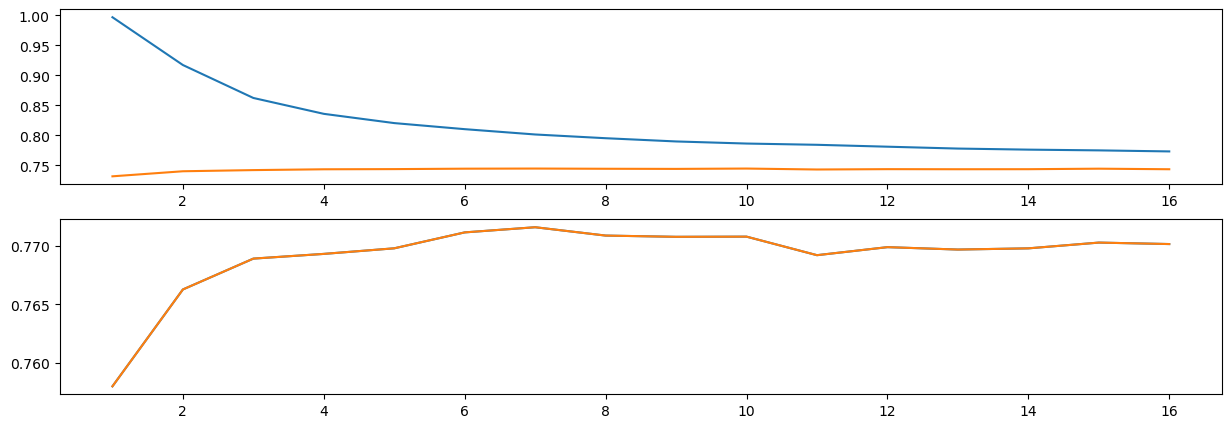

In [25]:
sc_train =[]
sc_test = []
sc_test_f = []
sc_train_f = []

min_leaf = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for n in min_leaf:
    rf = RandomForestClassifier(n_estimators=750, min_samples_leaf=n, n_jobs = -1)
    rf.fit(X_train, y_train)
    
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train_n_f = fbeta_score(y_train, rf.predict(X_train), beta=beta)
    sc_test_n_f = fbeta_score(y_test, rf.predict(X_test), beta=beta)
    
    sc_train.append(sc_train_n)
    sc_test.append(sc_test_n)
    sc_train_f.append(sc_test_n_f)
    sc_test_f.append(sc_test_n_f)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(min_leaf,sc_train, label='Train score')
ax1.plot(min_leaf,sc_test, label='Test score')
ax2.plot(min_leaf,sc_test_f, label='Test f_beta')
ax2.plot(min_leaf,sc_train_f, label='Train f_beta')

In [18]:
forest = RandomForestClassifier(n_estimators=750, min_samples_leaf=7, oob_score = True, n_jobs=-1)
forest.fit(X_train, y_train)

forest_predict = forest.predict(X_test)
forest_predict_proba = forest.predict_proba(X_test)[:,1]

print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, forest_predict, beta=beta)))

Правильность на обучающем наборе: 0.800
Правильность на OOB: 0.745
Правильность на тестовом наборе: 0.746
Метрика на тестовом наборе: 0.77141


### max_features

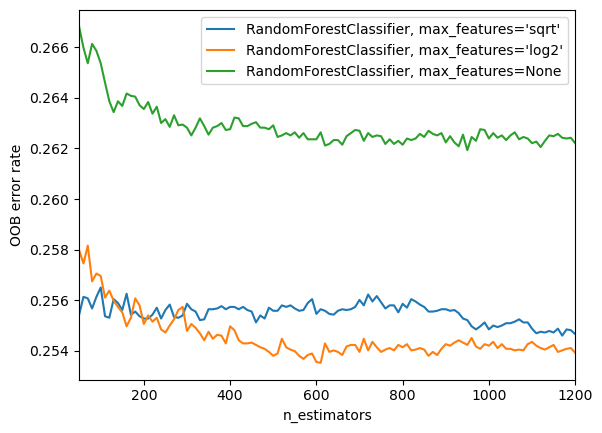

In [19]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 7,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            criterion= 'entropy',
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            n_jobs = -1,
            warm_start=True,
            min_samples_leaf = 7,
            max_features="log2",
            oob_score=True,
            criterion= 'entropy',
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 7,
            warm_start=True,
            max_features=None,
            oob_score=True,
            criterion= 'entropy',
        ),
    ),
]

# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 50
max_estimators = 1200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Создаем график «Коэффициент ошибок OOB» и график «n_estimators».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

### criterion

In [66]:
min_features = 1
max_features = X_train.shape[1]

ensemble_clfs = [
    (
        "RandomForestClassifier, gini",
        RandomForestClassifier(
            criterion='gini',
            min_samples_leaf = 7,
            n_jobs = -1,
            oob_score=True,
        ),
    ),
    (
        "RandomForestClassifier, entropy",
        RandomForestClassifier(
            criterion='entropy',
             min_samples_leaf = 7,
            n_jobs = -1,
            oob_score=True,
        ),
    )
]
# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(min_features, max_features + 1):
        clf.set_params(n_estimators = 200, max_features = i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

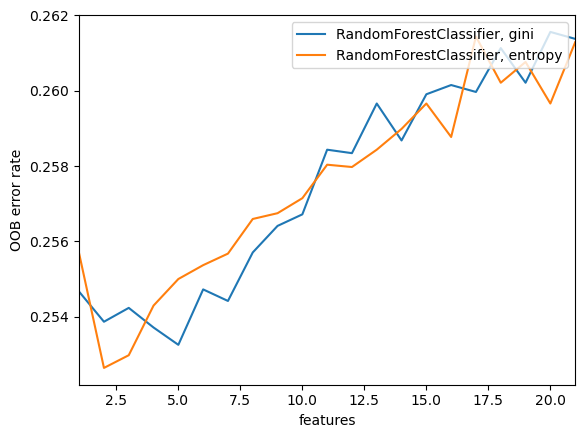

In [67]:
 for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_features, max_features)
plt.xlabel("features")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [68]:
forest = RandomForestClassifier(n_estimators=750, min_samples_leaf=7, oob_score = True, n_jobs=-1)
forest.fit(X_train, y_train)

forest_predict = forest.predict(X_test)
forest_predict_proba = forest.predict_proba(X_test)[:,1]

print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, forest_predict, beta=beta)))

Правильность на обучающем наборе: 0.802
Правильность на OOB: 0.746
Правильность на тестовом наборе: 0.743
Метрика на тестовом наборе: 0.76942


### class_weight

In [23]:
forest =  RandomForestClassifier(n_estimators=750,class_weight={0: 1, 1: 2}, min_samples_leaf=7, oob_score = True, n_jobs=-1)
forest.fit(X_train, y_train)

forest_predict = forest.predict(X_test)
forest_predict_proba = forest.predict_proba(X_test)[:,1]

print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(forest.oob_score_))
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, forest_predict, beta=beta)))

Правильность на обучающем наборе: 0.769
Правильность на OOB: 0.731
Правильность на тестовом наборе: 0.726
Метрика на тестовом наборе: 0.80585


## Тюнииг порога

In [24]:
model_tuned = TunedThresholdClassifierCV(estimator=forest, scoring=scorer)

cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=scorer,
        cv=5,
        return_train_score=True,
        return_estimator=True,
    )
)

median:  0.41004252383035783
mean:  0.41242323803523295


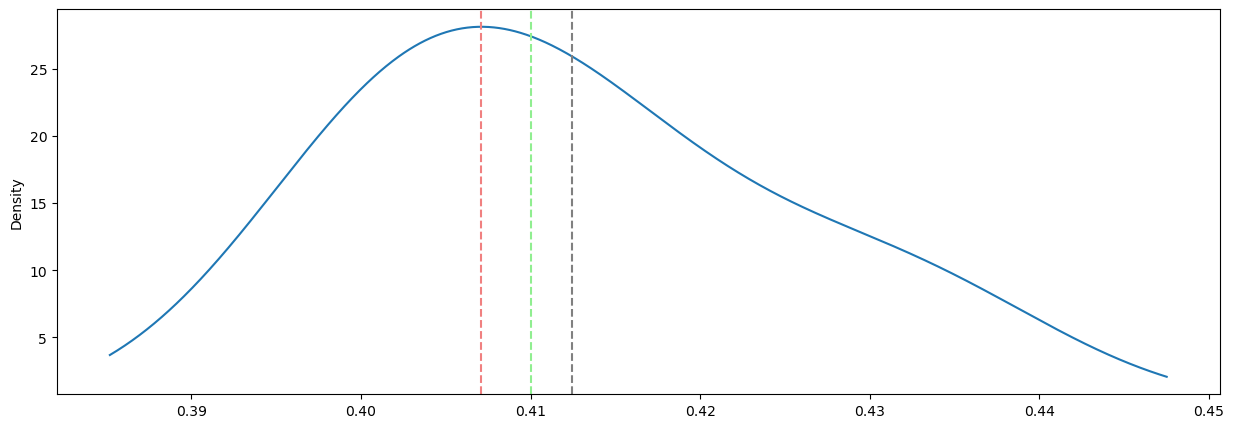

In [25]:
decision_threshold = pd.Series([est.best_threshold_ for est in cv_results_model_tuned["estimator"]])#

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None) # w_method=0.4
line = ax.get_lines() 
x_plt, y_plt = line[0].get_data()
ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}
for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )
print('median: ', decision_threshold.median())
print('mean: ', decision_threshold.mean())

fbeta:  0.8115490300619285


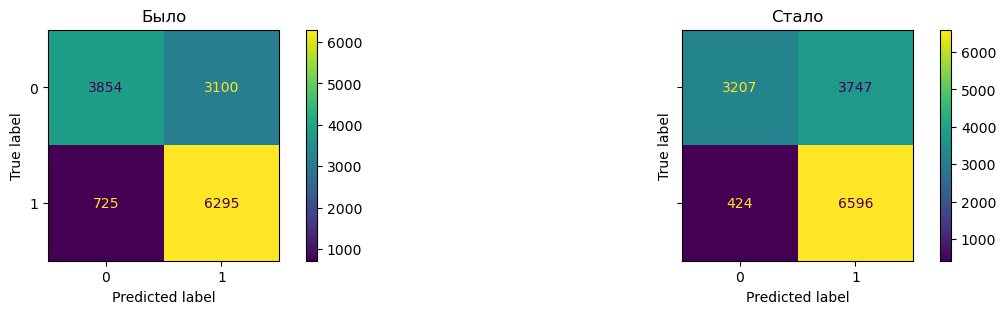

In [37]:
best_y_pred_forest = (forest_predict_proba > 0.41).astype(int) # decision_threshold.mean()).astype(int)

matrix_forest =confusion_matrix(y_test,forest_predict)
matrix_forest_best =confusion_matrix(y_test, best_y_pred_forest)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,3))

ConfusionMatrixDisplay(matrix_forest).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_forest_best).plot(ax = ax2);

ax1.set_title('Было')
ax2.set_title("Стало")

print('fbeta: ', fbeta_score(y_test, best_y_pred_forest, beta=beta))

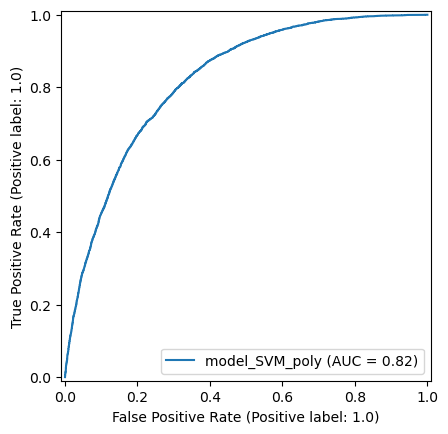

In [38]:
RocCurveDisplay.from_estimator(forest, X_test, y_test, name = 'model_SVM_poly');

# Boosting

In [30]:
gbrt = GradientBoostingClassifier(n_estimators=200, max_depth=3)
gbrt.fit(X_train, y_train)

gbrt_pred = gbrt.predict(X_test)
gbrt_pred_proba = gbrt.predict_proba(X_test)[:,1]
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, gbrt_pred, beta=beta)))

Правильность на обучающем наборе: 0.758
Правильность на тестовом наборе: 0.747
Метрика на тестовом наборе: 0.76810


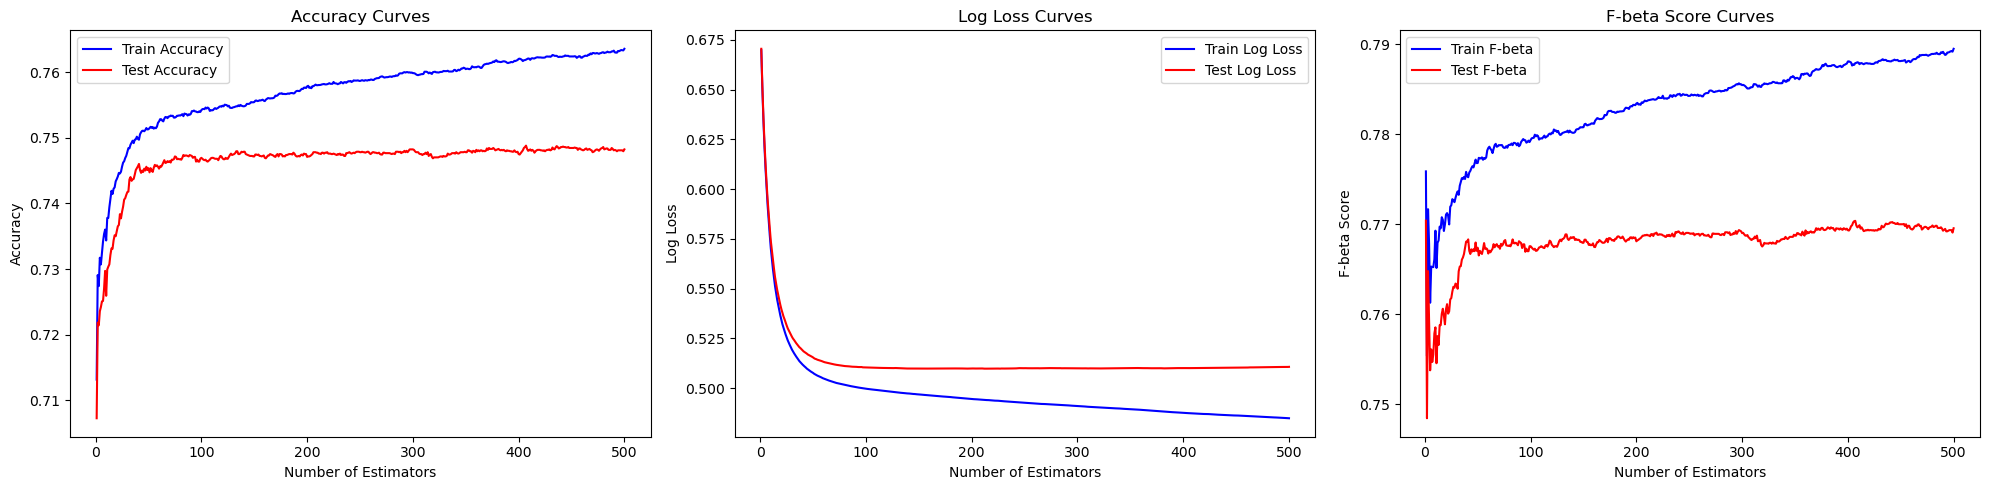

In [31]:
def plot_learning_curve_new(estimator, X_train, X_test, y_train, y_test, beta):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators)
    color_one = 'blue'
    color_two = 'red'

    train_score = zero.copy()
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = accuracy_score(y_train, y_pred_train)
    ax1.plot((np.arange(train_score.shape[0]) + 1), train_score, "-", color=color_one, label='Train Accuracy')

    test_score = zero.copy()
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        test_score[i] = accuracy_score(y_test, y_pred_test)
    ax1.plot((np.arange(test_score.shape[0]) + 1), test_score, "-", color=color_two, label='Test Accuracy')
    ax1.legend(loc='best')
    ax1.set_xlabel("Number of Estimators")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Accuracy Curves")

    train_deviance = zero.copy()
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
    ax2.plot((np.arange(train_deviance.shape[0]) + 1), train_deviance, '-', color=color_one, label=f'Train Log Loss')

    test_deviance = zero.copy()
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
    ax2.plot((np.arange(test_deviance.shape[0]) + 1), test_deviance, '-', color=color_two, label=f'Test Log Loss')
    ax2.legend(loc='best')
    ax2.set_xlabel("Number of Estimators")
    ax2.set_ylabel("Log Loss")
    ax2.set_title("Log Loss Curves")

    train_fbeta = zero.copy()
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_fbeta[i] = fbeta_score(y_train, y_pred_train, beta=beta)
    ax3.plot((np.arange(train_fbeta.shape[0]) + 1), train_fbeta, '-', color=color_one, label=f'Train F-beta')


    test_fbeta = zero.copy()
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)): 
        test_fbeta[i] = fbeta_score(y_test, y_pred_test, beta=beta)
    ax3.plot((np.arange(test_fbeta.shape[0]) + 1), test_fbeta, '-', color=color_two, label=f'Test F-beta')
    ax3.legend(loc='best')
    ax3.set_xlabel("Number of Estimators")
    ax3.set_ylabel("F-beta Score")
    ax3.set_title("F-beta Score Curves")

    plt.tight_layout()
    plt.show()

clf = GradientBoostingClassifier(n_estimators=500, max_depth=3)
clf.fit(X_train, y_train)
plot_learning_curve_new(clf, X_train, X_test, y_train, y_test, beta)

In [32]:
gbrt = GradientBoostingClassifier(n_estimators=300, max_depth=3)
gbrt.fit(X_train, y_train)

gbrt_pred = gbrt.predict(X_test)
gbrt_pred_proba = gbrt.predict_proba(X_test)[:,1]
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, gbrt_pred, beta=beta)))

Правильность на обучающем наборе: 0.760
Правильность на тестовом наборе: 0.748
Метрика на тестовом наборе: 0.76901


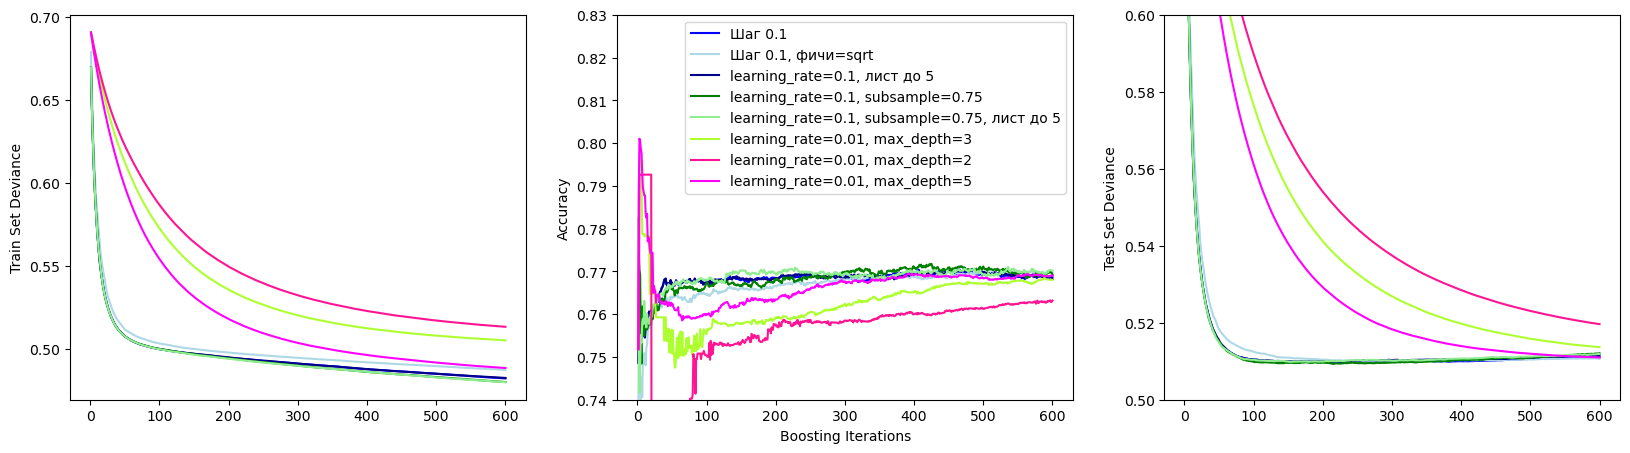

In [41]:
original_params = {
    "n_estimators": 600,
    'criterion': 'friedman_mse'   
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, subsample=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, subsample=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, max_depth=3",
             "#ADFF2F", {"learning_rate": 0.01, "max_depth": 3},
    ),
    ("learning_rate=0.01, max_depth=2",
             "#FF1493", {"learning_rate": 0.01, "max_depth": 2},
    ),
    ("learning_rate=0.01, max_depth=5",
             "#FF00FF", {"learning_rate": 0.01, "max_depth": 5},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = fbeta_score(y_test, y_pred, beta=beta)
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        

    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend()
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.74, 0.83)
ax3.set_ylim(0.50, 0.6)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()

In [89]:
gbrt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,min_samples_split=5,subsample=0.75)
gbrt.fit(X_train, y_train)

gbrt_pred = gbrt.predict(X_test)
gbrt_pred_proba = gbrt.predict_proba(X_test)[:,1]
print('Правильность на обучающем наборе: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(gbrt.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, gbrt_pred, beta=beta)))

Правильность на обучающем наборе: 0.758
Правильность на тестовом наборе: 0.749
Метрика на тестовом наборе: 0.76947


## Тюнинг порога

In [90]:
model_tuned = TunedThresholdClassifierCV(estimator=gbrt, scoring=scorer)

cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=scorer,
        cv=5,
        return_train_score=True,
        return_estimator=True,
    )
)

median:  0.25361115738543
mean:  0.25881491540886625


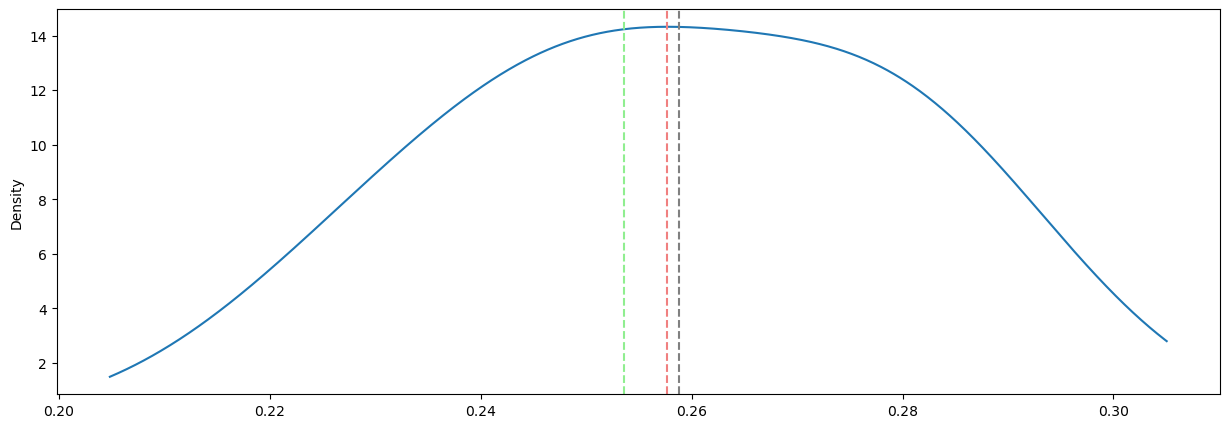

In [91]:
decision_threshold = pd.Series([est.best_threshold_ for est in cv_results_model_tuned["estimator"]])#

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None) # w_method=0.4
line = ax.get_lines() 
x_plt, y_plt = line[0].get_data()
ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}
for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )
print('median: ', decision_threshold.median())
print('mean: ', decision_threshold.mean())

fbeta:  0.8139046678192147


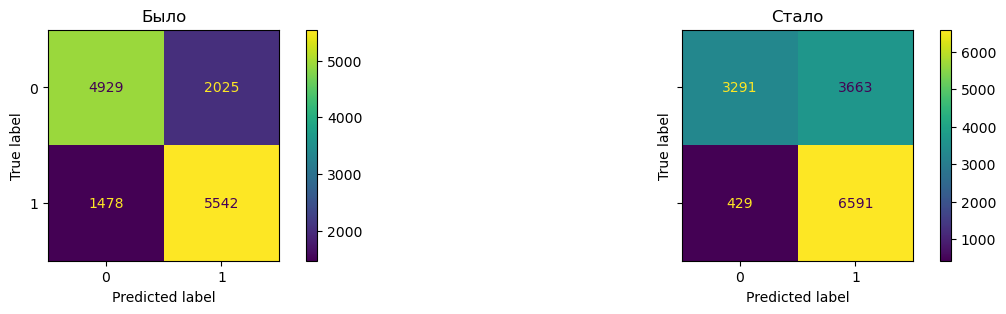

In [92]:
best_y_pred_gbrt = (gbrt_pred_proba >0.254).astype(int) # decision_threshold.mean()).astype(int)

matrix_gbrt =confusion_matrix(y_test,gbrt_pred)
matrix_gbrt_best =confusion_matrix(y_test, best_y_pred_gbrt)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,3))

ConfusionMatrixDisplay(matrix_gbrt).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_gbrt_best).plot(ax = ax2);

ax1.set_title('Было')
ax2.set_title("Стало")

print('fbeta: ', fbeta_score(y_test, best_y_pred_gbrt, beta=beta))

# HistGradientBoostingClassifier

In [57]:
hgbrt = HistGradientBoostingClassifier(class_weight={0: 1, 1: 2}, max_depth=3)
hgbrt.fit(X_train, y_train)

hgbrt_pred = hgbrt.predict(X_test)
hgbrt_pred_proba = hgbrt.predict_proba(X_test)[:,1]
print('Правильность на обучающем наборе: {:.3f}'.format(hgbrt.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(hgbrt.score(X_test, y_test)))
print('Метрика на тестовом наборе: {:.5f}'.format(fbeta_score(y_test, hgbrt_pred, beta=beta)))

Правильность на обучающем наборе: 0.734
Правильность на тестовом наборе: 0.727
Метрика на тестовом наборе: 0.81065


## Тюнинг порогов

median:  0.43867232784341464
mean:  0.4277250835649527


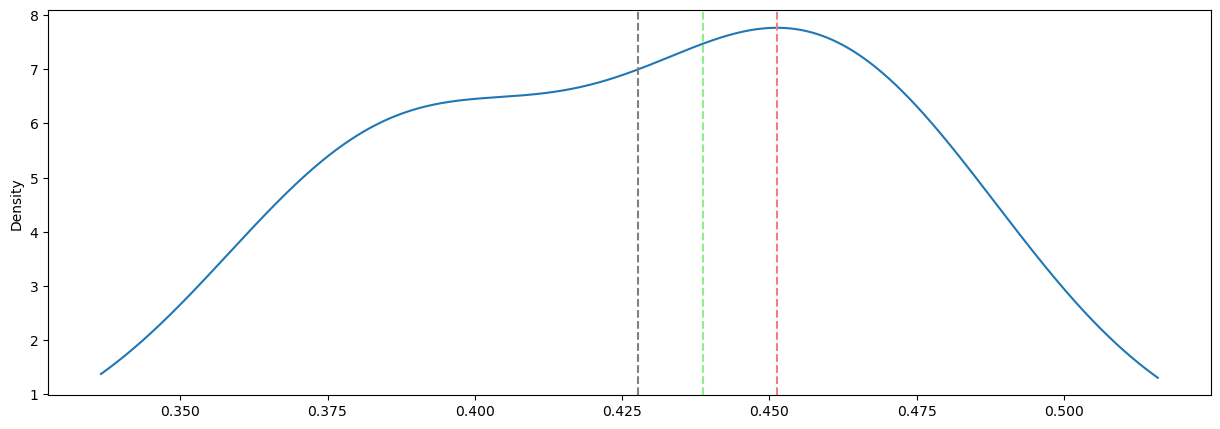

In [58]:
model_tuned = TunedThresholdClassifierCV(estimator=hgbrt, scoring=scorer)

cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=scorer,
        cv=5,
        return_train_score=True,
        return_estimator=True,
    )
)

decision_threshold = pd.Series([est.best_threshold_ for est in cv_results_model_tuned["estimator"]])#

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None) # w_method=0.4
line = ax.get_lines() 
x_plt, y_plt = line[0].get_data()
ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}
for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )
print('median: ', decision_threshold.median())
print('mean: ', decision_threshold.mean())

fbeta:  0.8115490300619285


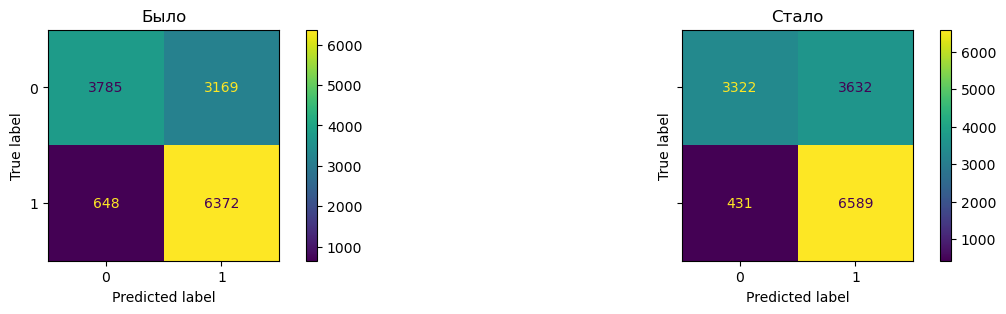

In [59]:
best_y_pred_hgbrt = (hgbrt_pred_proba > decision_threshold.mean()).astype(int)

matrix_hgbrt =confusion_matrix(y_test,hgbrt_pred)
matrix_hgbrt_best =confusion_matrix(y_test, best_y_pred_hgbrt)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,3))

ConfusionMatrixDisplay(matrix_hgbrt).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_hgbrt_best).plot(ax = ax2);

ax1.set_title('Было')
ax2.set_title("Стало")

print('fbeta: ', fbeta_score(y_test, best_y_pred_forest, beta=beta))

# LR

In [62]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf', LogisticRegression(max_iter=1500))])


scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': [None], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, scoring='roc_auc', cv = 5, return_train_score = True)
grid.fit(X_train, y_train)
 
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,14,6,10,2,13,5,1,17,21,9,22,18,20,12,16,8,0,4,19,23,15,3,11,7
mean_fit_time,0.078684,0.14172,0.134,0.121263,0.066549,0.043613,0.094162,0.050212,0.084582,0.119227,0.122975,0.153778,0.108991,0.709038,0.113097,0.189175,0.119026,0.105432,0.28176,0.101446,5.230838,0.076509,0.151034,0.113957
std_fit_time,0.004847,0.001967,0.002354,0.002449,0.001127,0.000489,0.00806,0.003187,0.000462,0.000748,0.009024,0.013558,0.000789,0.031099,0.010611,0.015601,0.005898,0.012876,0.011757,0.000965,0.284204,0.002221,0.002967,0.016094
mean_score_time,0.007201,0.006598,0.006802,0.006599,0.007002,0.006198,0.006799,0.007402,0.006401,0.006802,0.006401,0.0072,0.0064,0.007003,0.006598,0.006602,0.007401,0.006398,0.007198,0.007,0.007002,0.007402,0.007001,0.007201
std_score_time,0.000399,0.00049,0.0004,0.000491,0.000632,0.0004,0.000749,0.000491,0.00049,0.000749,0.000491,0.000748,0.00049,0.001097,0.00049,0.00049,0.001021,0.00049,0.000405,0.000002,0.0,0.00049,0.0,0.0004
param_clf__penalty,l1,l2,l2,l2,l1,l2,l2,None,None,l2,None,None,None,l1,None,l2,l2,l2,None,None,l1,l2,l2,l2
param_clf__solver,liblinear,lbfgs,liblinear,newton-cg,liblinear,lbfgs,newton-cg,lbfgs,newton-cg,liblinear,newton-cg,lbfgs,newton-cg,liblinear,lbfgs,liblinear,newton-cg,lbfgs,lbfgs,newton-cg,liblinear,newton-cg,liblinear,lbfgs
param_preprocessing,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'lbfgs',...","{'clf__penalty': None, 'clf__solver': 'newton-...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',..."
split0_test_score,0.817131,0.817151,0.817145,0.817151,0.817123,0.817126,0.817134,0.817124,0.81713,0.817131,0.81714,0.817132,0.817118,0.817141,0.81713,0.817118,0.817029,0.817038,0.797011,0.797223,0.796629,0.785772,0.785688,0.785386
split1_test_score,0.82589,0.825886,0.825885,0.825906,0.825875,0.825866,0.825868,0.825865,0.82587,0.825867,0.825869,0.825864,0.825855,0.825871,0.825837,0.825674,0.825609,0.82561,0.804537,0.80445,0.803789,0.795974,0.795745,0.795677


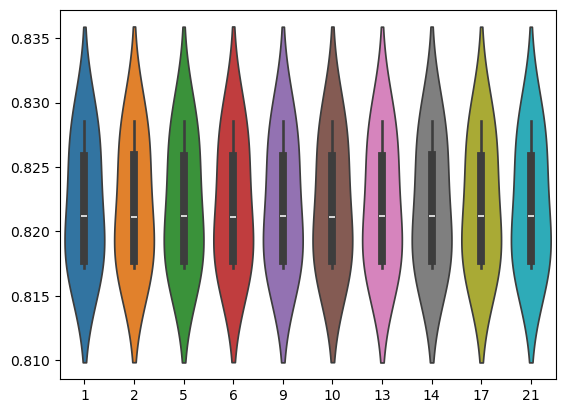

In [63]:
mask_1 = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask_1].iloc[:,:10]
sns.violinplot(data=tabl);

In [64]:
grid.cv_results_['params'][1]

{'clf__penalty': 'l2',
 'clf__solver': 'newton-cg',
 'preprocessing': StandardScaler()}

In [65]:
model_LR = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2') )
model_LR.fit(X_train,y_train)

y_pred_LR = model_LR.predict(X_test)
y_pred_proba_LR = model_LR.predict_proba(X_test)[:,1]

print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=beta))

fbeta:  0.7555867884750527


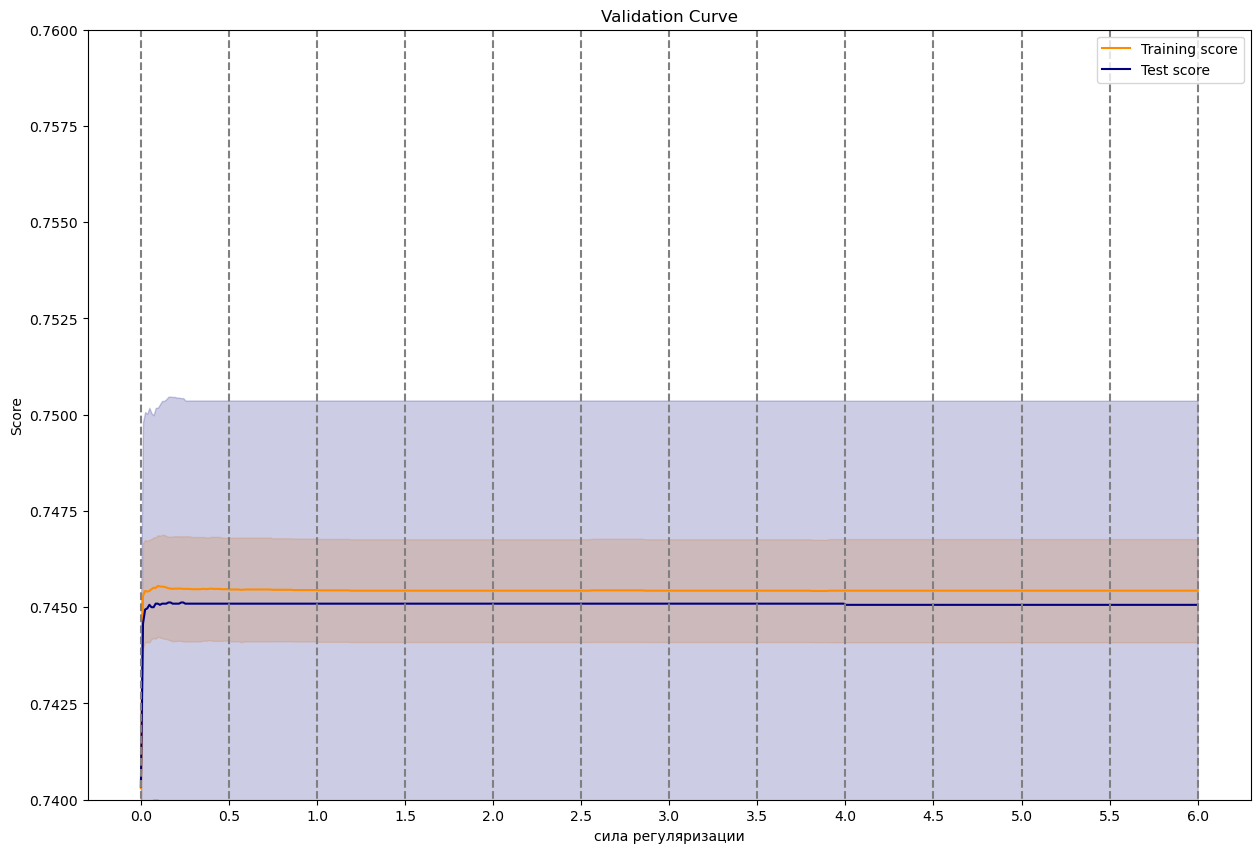

In [68]:
n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    model_LR , X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = 5, 
    scoring='accuracy', 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.74, 0.76)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Test score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 13))
for i in np.arange(0,6.5,0.5):
    plt.vlines(i, 0,1.2, linestyles='dashed', colors='gray')

plt.legend(loc="best")
plt.show();

In [69]:
model_LR_best = make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2', C =2) )
model_LR_best.fit(X_train,y_train)

y_pred_LR_best = model_LR_best.predict(X_test)
y_pred_proba_LR_best = model_LR_best.predict_proba(X_test)[:,1]

print('fbeta: ', fbeta_score(y_test, y_pred_LR_best, beta=beta))

fbeta:  0.7559021922428331


## Тюнинг порога

median:  0.2745615108883627
mean:  0.2751471998856791


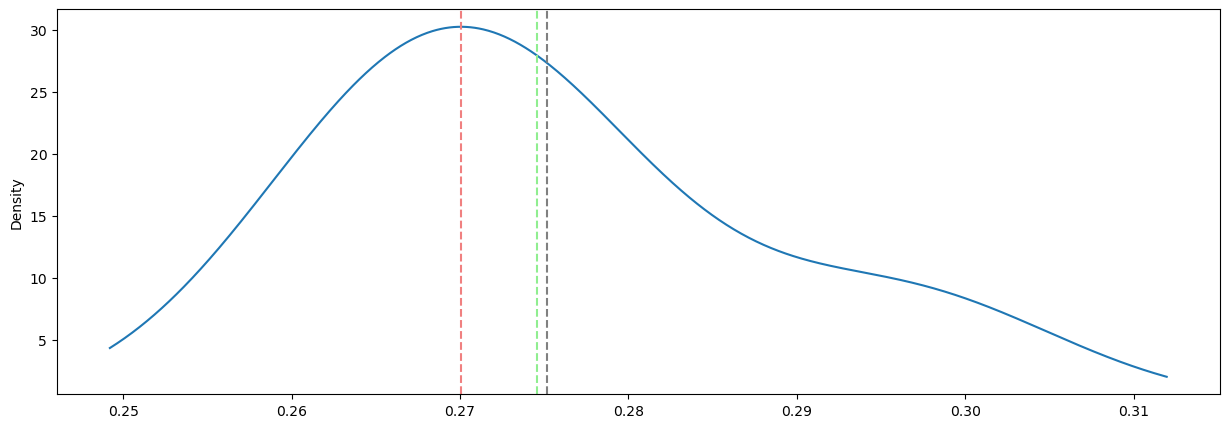

In [70]:
model_tuned = TunedThresholdClassifierCV(estimator = model_LR_best, scoring=scorer)

cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=scorer,
        cv=5,
        return_train_score=True,
        return_estimator=True,
    )
)

decision_threshold = pd.Series([est.best_threshold_ for est in cv_results_model_tuned["estimator"]])

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None) # w_method=0.4
line = ax.get_lines() 
x_plt, y_plt = line[0].get_data()
ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}
for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )
print('median: ', decision_threshold.median())
print('mean: ', decision_threshold.mean())

fbeta:  0.813267203967762


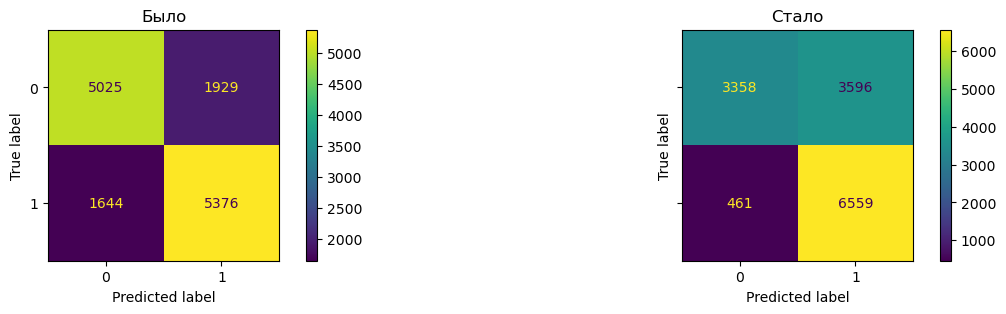

In [71]:
best_y_pred_LR_best = (y_pred_proba_LR_best > decision_threshold.mean()).astype(int)

matrix_LR =confusion_matrix(y_test,y_pred_LR)
matrix_LR_best =confusion_matrix(y_test, best_y_pred_LR_best)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,3))

ConfusionMatrixDisplay(matrix_LR).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_LR_best).plot(ax = ax2);

ax1.set_title('Было')
ax2.set_title("Стало")

print('fbeta: ', fbeta_score(y_test, best_y_pred_LR_best, beta=beta))

# Staking

In [83]:
clf_v1 = FixedThresholdClassifier(make_pipeline(MinMaxScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2', C =2 )),threshold=0.275)
clf_v2 = FixedThresholdClassifier(RandomForestClassifier(n_estimators=750,class_weight={0: 1, 1: 2}, min_samples_leaf=7, oob_score = True, n_jobs=-1), threshold=0.41)
clf_v3 = FixedThresholdClassifier(GradientBoostingClassifier(n_estimators=300,learning_rate=0.1,min_samples_split=5,subsample=0.75), threshold=0.254)

e_s_clf = StackingClassifier(
        estimators = [
            ('lr', clf_v1), 
            ('rf', clf_v2), 
            ('gb', clf_v3)],
        final_estimator = LogisticRegression(max_iter=1000),
        stack_method = 'predict_proba'
)

for clf, label in zip([clf_v1, clf_v2, clf_v3, e_s_clf], ['Logistic Regression', 'Random Forest', 
                                                 'HistGradientBoosting', 'Stacking']):
    scores = cross_val_score(clf, X, y, scoring=scorer, cv=ShuffleSplit(n_splits=5))
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.813 (+/- 0.006) [Logistic Regression]
Accuracy: 0.815 (+/- 0.004) [Random Forest]
Accuracy: 0.820 (+/- 0.003) [HistGradientBoosting]
Accuracy: 0.780 (+/- 0.008) [Stacking]
